# L1 and L2 processing OMG Narwhals data - create netCDFs from mooring CTD sbe37 data

## // automated version

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import string
import numpy as np
import pandas as pd
import csv
import glob, os
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import netCDF4 as nc4
import omg37_funs

## look at example OMG CTD netCDF files to mimic organization of data

In [ ]:
# example 1
# data = xr.open_dataset('C:/Users/marie/Documents/PhD/Chapter_3/data/Example_OMG_datasets/OMG_Ocean_AXCTD_L2_20160913152643.nc')
# # with xr.set_options(display_style="html"):
# #     display(data)

# data

In [ ]:
## example 2
# data = xr.open_dataset('C:/Users/marie/Documents/PhD/Chapter_3/data/Example_OMG_datasets/OMG_Ocean_CTD_L2_20200819191226.nc')
# with xr.set_options(display_style="html"):
#     display(data)

## Define output directory for L2 files

In [47]:
# output_dir = Path('/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019')
output_dir = Path('/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020')

## Get all data filenames in directory and metadata from csv

In [48]:
## get all filenames and metadata

## 2019
# os.chdir("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2019/SBE37")
# metafile = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2019/SBE37_metadata_2019.csv")

#2020
os.chdir("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2020/SBE37")
metafile = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2020/SBE37_metadata_2020.csv")

cnvfiles = []
for file in glob.glob("*.cnv"):
    cnvfiles.append(file)
print(cnvfiles)

## get all metadata associated with each data file
# read in csv with metadata
metadata = pd.read_csv(metafile)
metadata

['SBE37SM-RS232_03716526_2021_11_18_ascii.cnv', 'SBE37SM-RS232_03716754_2021_11_18_ascii.cnv', 'SBE37SM-RS232_03716787_2021_11_18_ascii.cnv', 'SBE37SM-RS232_03716790_2021_11_22_ascii.cnv']


,filename,filename_L2,glacier_front,lat,lon,uuid_L2,uuid_L1,depth_target,depth_actual,bottom_depth
0,SBE37SM-RS232_03716787_2021_11_18_ascii.cnv,OMG_Narwhals_Mooring_CTD_L2_2020080603716787.nc,Kong Oscar glacier,75.841817,-59.843117,37f97f0e-726d-11ec-90d6-0242ac120003,37f9886e-726d-11ec-90d6-0242ac120003,100 meters,94 meters,250 meters
1,SBE37SM-RS232_03716790_2021_11_22_ascii.cnv,OMG_Narwhals_Mooring_CTD_L2_2020080603716790.nc,Kong Oscar glacier,75.841817,-59.843117,37f981e8-726d-11ec-90d6-0242ac120003,37f98a3a-726d-11ec-90d6-0242ac120003,235 meters,226 meters,250 meters
2,SBE37SM-RS232_03716754_2021_11_18_ascii.cnv,OMG_Narwhals_Mooring_CTD_L2_2020080603716754.nc,Fisher Islands,76.103817,-61.726983,37f9833c-726d-11ec-90d6-0242ac120003,37f98b8e-726d-11ec-90d6-0242ac120003,120 meters,137 meters,370 meters
3,SBE37SM-RS232_03716526_2021_11_18_ascii.cnv,OMG_Narwhals_Mooring_CTD_L2_2020080603716526.nc,Fisher Islands,76.103817,-61.726983,37f986b6-726d-11ec-90d6-0242ac120003,37f98ca6-726d-11ec-90d6-0242ac120003,360 meters,377 meters,370 meters


# **For a single file**

In [34]:
cnvfiles

['sbe37sm-rs232_03716526_2019_08_04ascii.cnv',
 'sbe37sm-rs232_03716754_2019_08_04ascii.cnv',
 'sbe37sm-rs232_03716787_2019_08_03ascii.cnv',
 'sbe37sm-rs232_03716788_2019_08_05ascii.cnv',
 'SBE37SM-RS232_03716789_2019_08_05ascii.cnv',
 'sbe37sm-rs232_03716790_2019_08_03ascii.cnv']

In [ ]:
## For single run of a file, instead of loop for all files in directory

# filename = 'sbe37sm-rs232_03716526_2019_08_04ascii.cnv'
filename = 'sbe37sm-rs232_03716788_2019_08_05ascii.cnv'

# extract metadata
data = metadata.loc[metadata['filename'] == filename] # select row for cnv file 'filename'
glacier_front = data.glacier_front.values[0]
lat = data.lat.values[0]
lon = data.lon.values[0]
bottom_depth = data.bottom_depth.values[0]

## =================== COMMENT OUT LINE FOR DESIRED FILE PATH - 2019 OR 2020 =================== ##
file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2019/SBE37/" + filename)
# file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2020/SBE37/" + filename)

uuid = data.uuid_L2.values[0]
depth_target = data.depth_target.values[0]
depth_actual = data.depth_actual.values[0]

## =================== COMMENT OUT LINE FOR DESIRED YEAR - 2019 OR 2020 =================== ##
netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_201908' + filename[31:33] + filename[14:22] + '.nc'
# netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_202008' + filename[31:33] + filename[14:22] + '.nc'
print(netcdf_filename)

## extract data, create dataset, and add metadata
data_lines, device_type, serial_number, start_time_dt64, start_date, sample_interval_plain, sample_interval_td64, var_names = omg37_funs.open_omg_file(file)
mooring_ds = omg37_funs.create_Dataset(glacier_front, data_lines, start_time_dt64, sample_interval_td64)
mooring_ds = omg37_funs.add_metadata(mooring_ds, uuid, lat, lon, start_date, glacier_front, bottom_depth, netcdf_filename, serial_number, device_type, depth_target, depth_actual, sample_interval_plain)

## Create NetCDF variable encoding (required to save the time values properly)
new_encoding = omg37_funs.create_encoding(mooring_ds)

## Save xarray DataSet object as netcdf
num_times = len(mooring_ds.time)

## =================== COMMENT OUT LINE FOR DESIRED YEAR - 2019 OR 2020 =================== ##
# 2019
mooring_ds_truncated = mooring_ds.isel(time=range(0,num_times-960)) # truncate the last 2 days of measurement times
# 2020
# mooring_ds_truncated = mooring_ds.sel(time=slice("2019-08-06","2020-08-09")) # truncate to day before recovery of moorings

netcdf_filename = Path(netcdf_filename)
mooring_ds_truncated.to_netcdf(output_dir / netcdf_filename,encoding=new_encoding)
mooring_ds_truncated.close()

In [ ]:
mooring_ds.temperature.plot()

In [ ]:
## check depth for all data
mooring_ds_truncated.depth.plot()
plt.scatter(mooring_ds_truncated.time[np.where(mooring_ds_truncated.flag_depth == 1)],
            mooring_ds_truncated.depth[np.where(mooring_ds_truncated.flag_depth == 1)], color = 'r')

In [ ]:
## check depth for data with depth outliers removed
depth_da = mooring_ds_truncated.depth[np.where(mooring_ds_truncated.flag_depth == 0)]

plt.plot(depth_da.time[:-480], depth_da[:-480], ".")
plt.title('depth with outlier data removed')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
mooring_ds_truncated.temperature.plot()

# **The master loop**

## comment out sections pertaining to 2019 or 2020 files

OMG_Narwhals_Mooring_CTD_L2_2019080403716526.nc
number data lines 165403
number header lines 312 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716526'>
2018-08-25T00:00:01
before
[237.000012 237.002095 237.004178 237.006262 237.008345]

after
[numpy.datetime64('2018-08-25T00:00:01'),
 numpy.datetime64('2018-08-25T00:03:01'),
 numpy.datetime64('2018-08-25T00:06:01'),
 numpy.datetime64('2018-08-25T00:09:01'),
 numpy.datetime64('2018-08-25T00:12:01')]
recording start time:  2018-08-25T00:00:01
recording end time:  2019-08-04T14:06:01


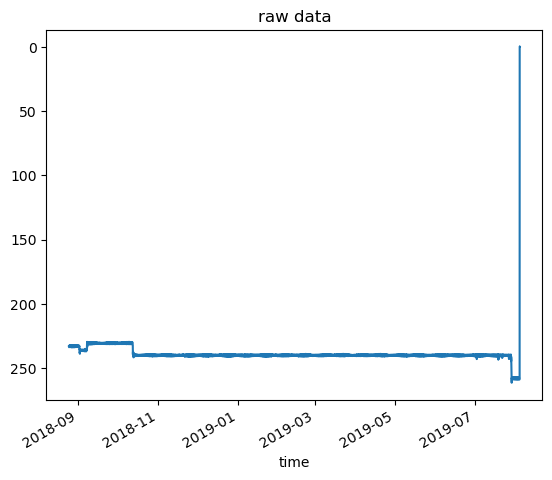

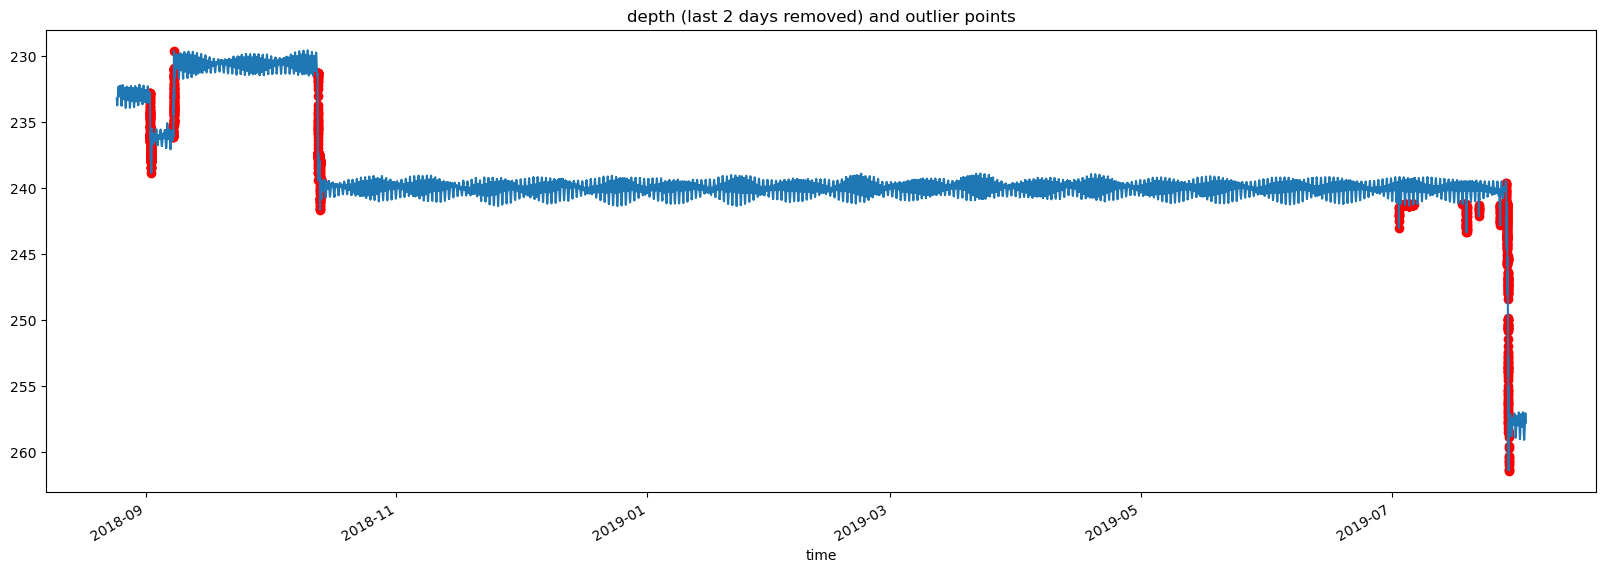

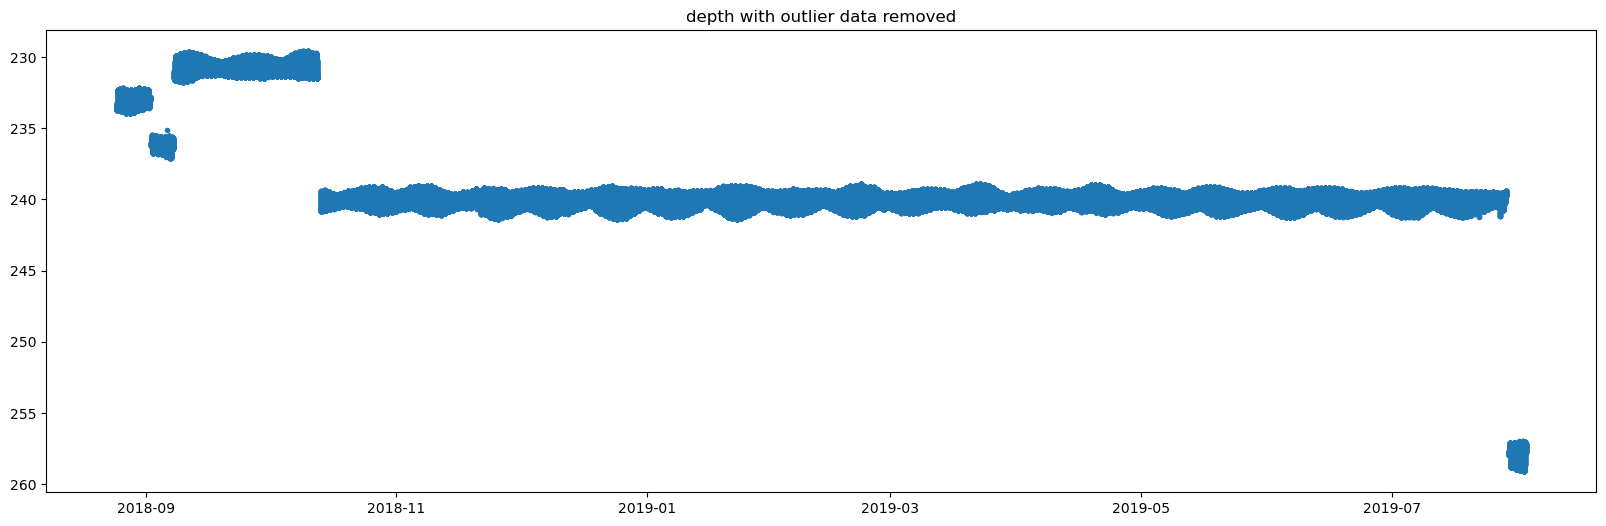

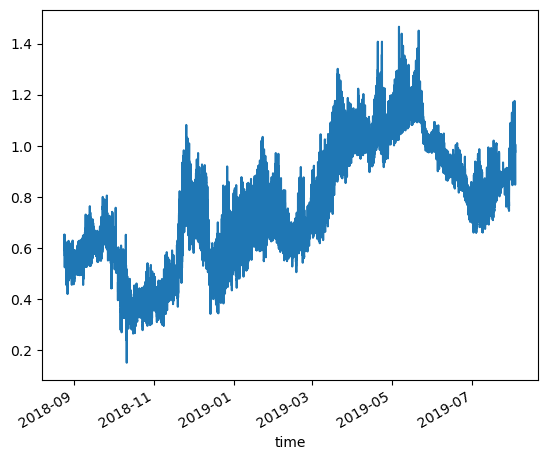

<xarray.Dataset>
Dimensions:                (time: 165403)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-25T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.885 2.891 ... 0.000162 0.000162
    density                (time) float64 1.028e+03 1.028e+03 ... 999.6 999.6
    depth                  (time) float64 233.2 233.2 233.2 ... 0.045 0.045
    potential_temperature  (time) float64 0.6513 0.6524 0.6535 ... 11.06 10.95
    pressure               (time) float64 235.8 235.8 235.8 ... 0.045 0.045
    salinity               (time) float64 33.87 33.95 33.95 ... 0.006 0.006
    temperature            (time) float64 0.6611 0.6622 0.6633 ... 11.06 10.95
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069f0a8-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

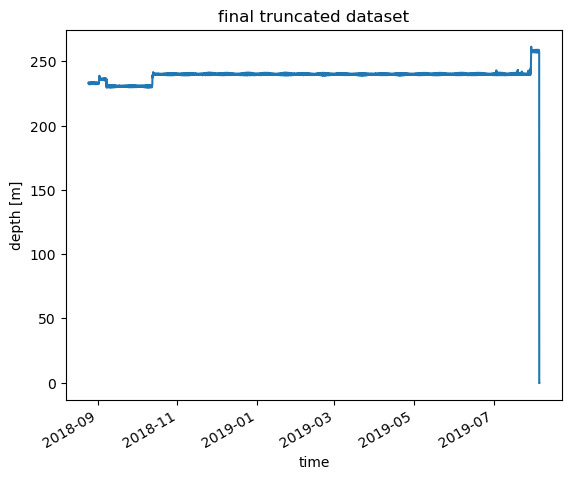

OMG_Narwhals_Mooring_CTD_L2_2019080403716754.nc
number data lines 165385
number header lines 310 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716754'>
2018-08-25T00:00:01
before
[237.000012 237.002095 237.004178 237.006262 237.008345]

after
[numpy.datetime64('2018-08-25T00:00:01'),
 numpy.datetime64('2018-08-25T00:03:01'),
 numpy.datetime64('2018-08-25T00:06:01'),
 numpy.datetime64('2018-08-25T00:09:01'),
 numpy.datetime64('2018-08-25T00:12:01')]
recording start time:  2018-08-25T00:00:01
recording end time:  2019-08-04T13:12:01


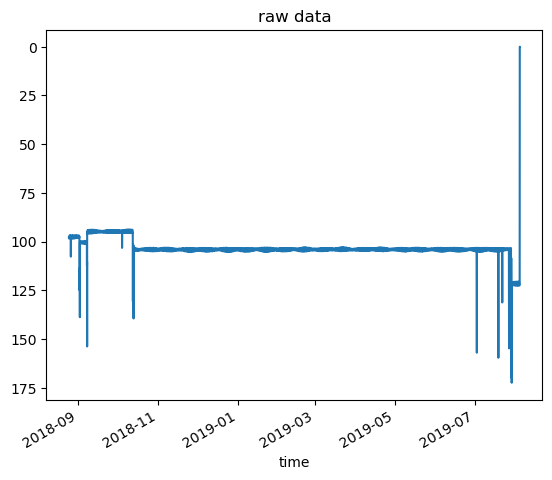

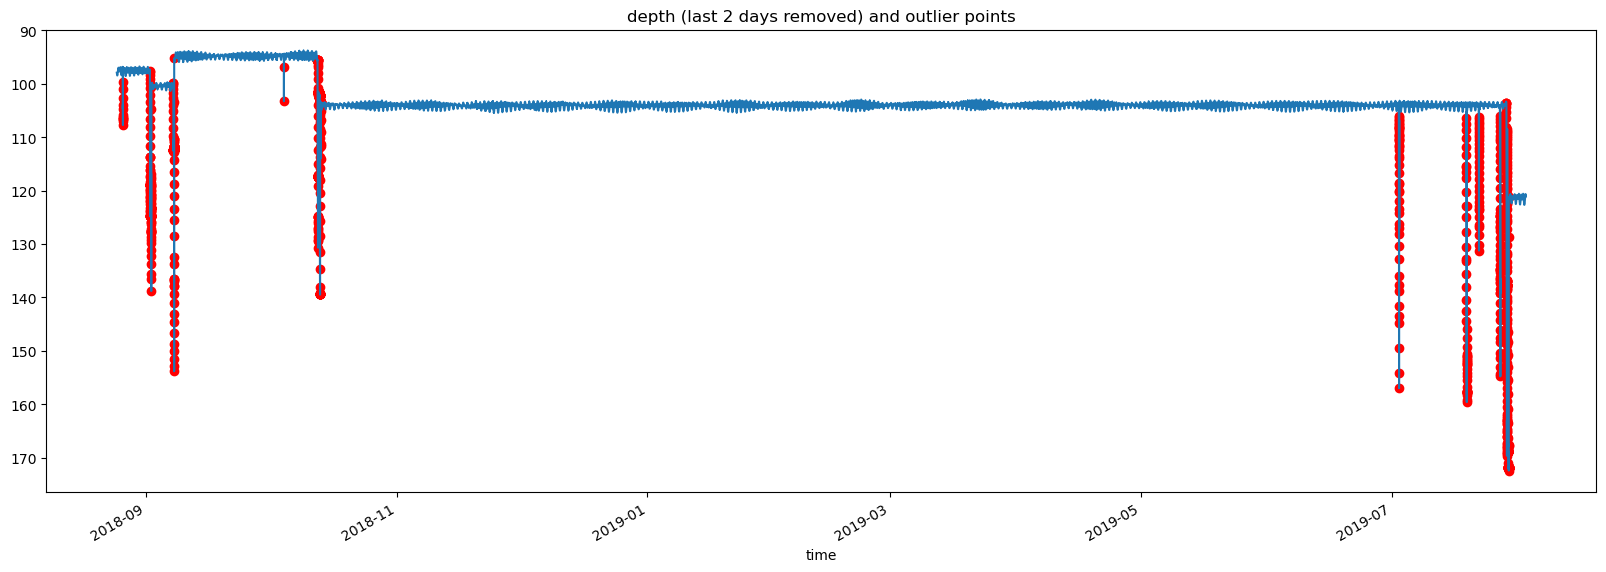

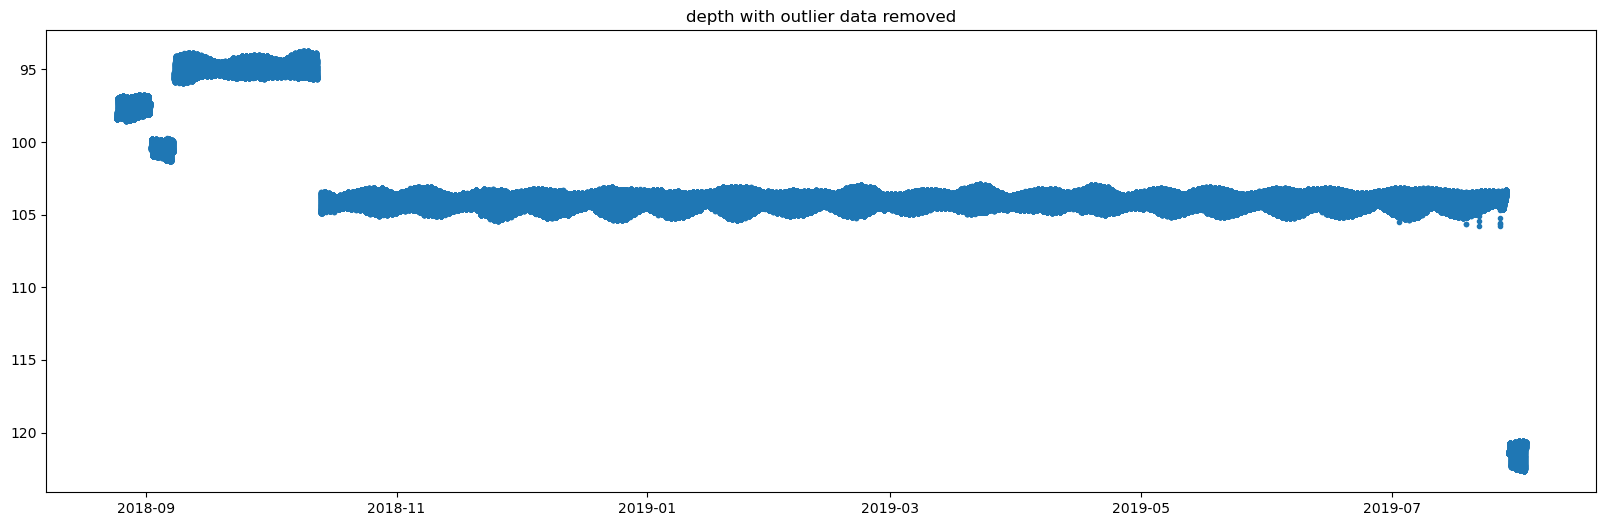

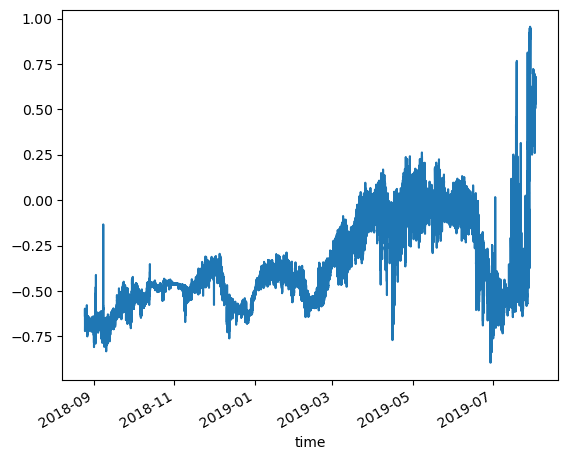

<xarray.Dataset>
Dimensions:                (time: 165385)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-25T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.706 2.738 2.739 ... 8.2e-05 8.2e-05
    density                (time) float64 1.027e+03 1.027e+03 ... 999.8 999.8
    depth                  (time) float64 97.91 97.92 97.94 ... 0.039 0.038
    potential_temperature  (time) float64 -0.6351 -0.6251 ... 9.037 9.166
    pressure               (time) float64 98.96 98.98 98.99 ... 0.034 0.04 0.038
    salinity               (time) float64 33.0 33.43 33.43 ... 0.0046 0.0047
    temperature            (time) float64 -0.6324 -0.6223 ... 9.037 9.166
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069ef2c-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

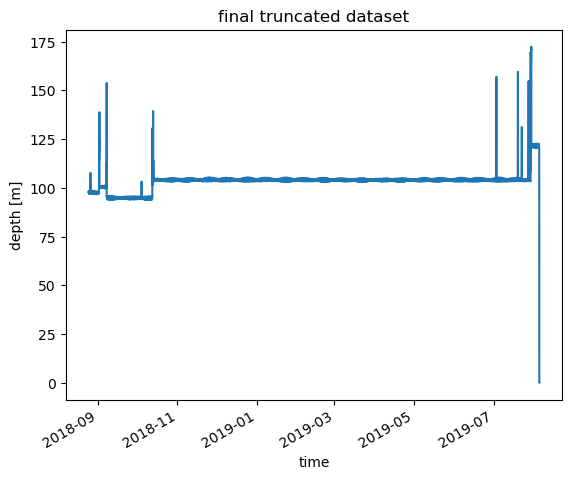

OMG_Narwhals_Mooring_CTD_L2_2019080303716787.nc
number data lines 165499
number header lines 299 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716787'>
2018-08-24T00:00:01
before
[236.000012 236.002095 236.004178 236.006262 236.008345]

after
[numpy.datetime64('2018-08-24T00:00:01'),
 numpy.datetime64('2018-08-24T00:03:01'),
 numpy.datetime64('2018-08-24T00:06:01'),
 numpy.datetime64('2018-08-24T00:09:01'),
 numpy.datetime64('2018-08-24T00:12:01')]
recording start time:  2018-08-24T00:00:01
recording end time:  2019-08-03T18:54:01


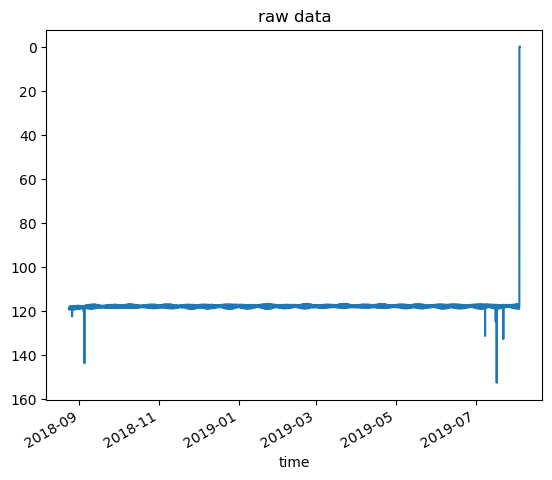

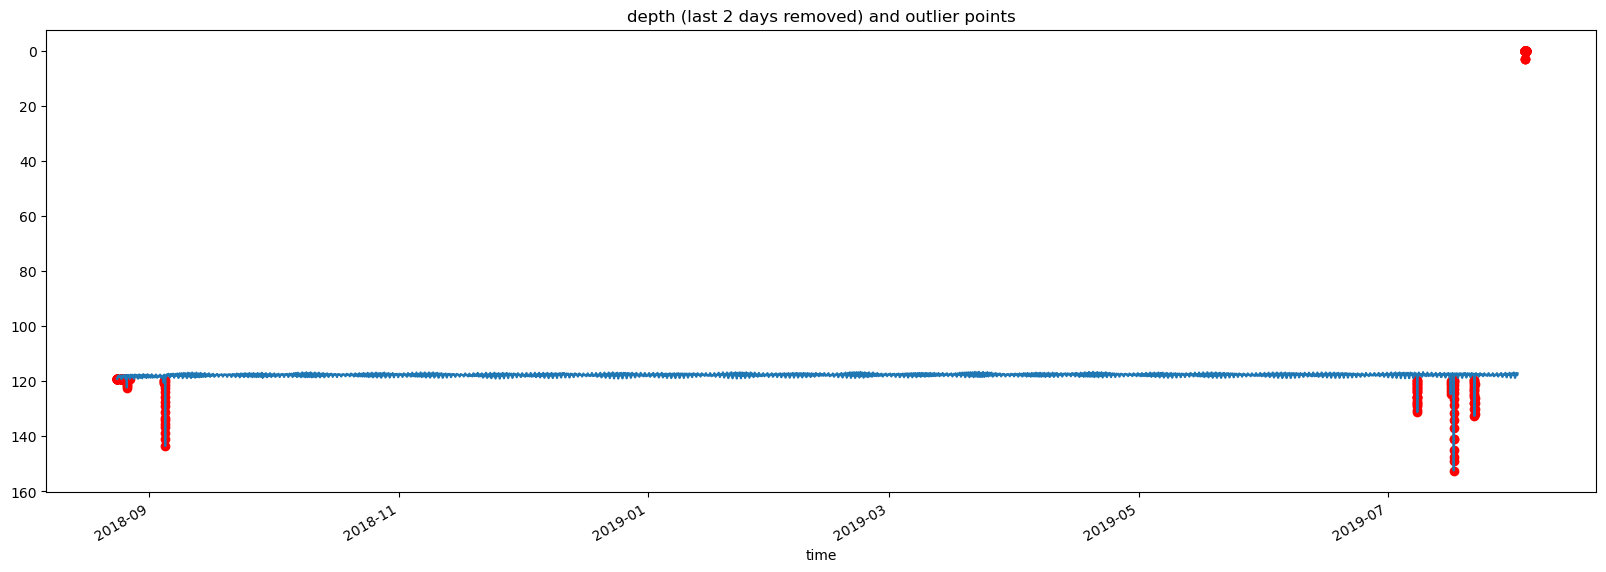

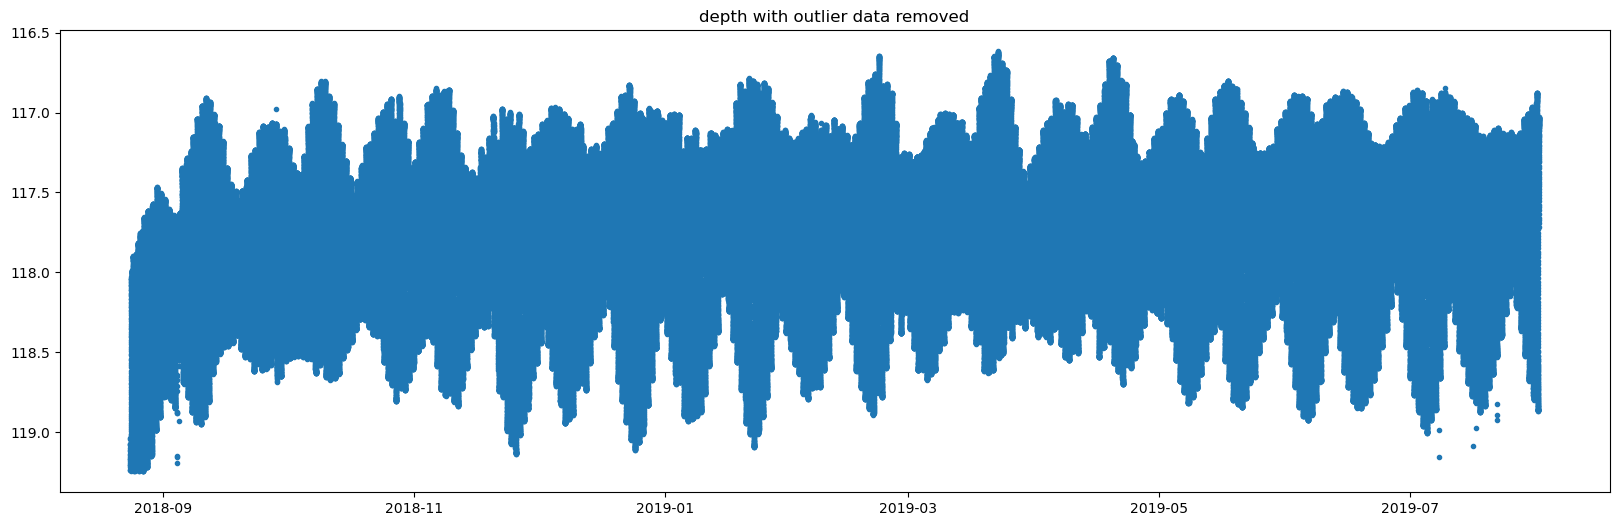

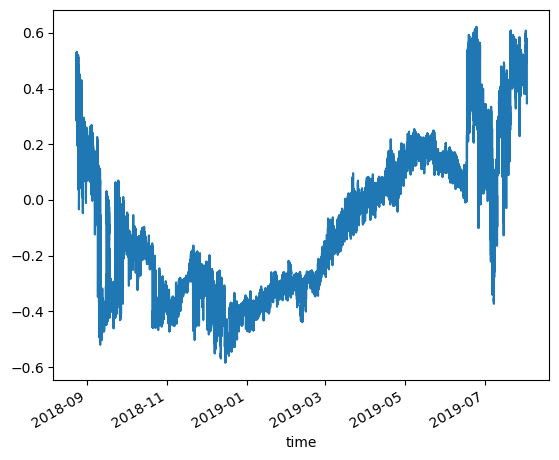

<xarray.Dataset>
Dimensions:                (time: 165499)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-24T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.816 2.84 2.841 ... 0.00012 0.000123
    density                (time) float64 1.027e+03 1.028e+03 ... 999.4 999.4
    depth                  (time) float64 119.0 119.0 119.1 ... 0.017 0.019
    potential_temperature  (time) float64 0.4506 0.4498 0.4513 ... 12.48 12.61
    pressure               (time) float64 120.3 120.3 120.4 ... 0.017 0.019
    salinity               (time) float64 33.26 33.58 33.59 ... 0.0066 0.0067
    temperature            (time) float64 0.4551 0.4544 0.4559 ... 12.48 12.61
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069f170-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

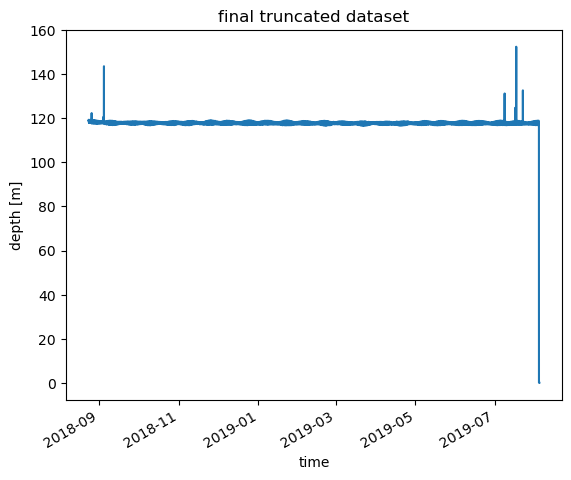

OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc
number data lines 165351
number header lines 312 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716788'>
2018-08-26T00:00:01
before
[238.000012 238.002095 238.004178 238.006262 238.008345]

after
[numpy.datetime64('2018-08-26T00:00:01'),
 numpy.datetime64('2018-08-26T00:03:01'),
 numpy.datetime64('2018-08-26T00:06:01'),
 numpy.datetime64('2018-08-26T00:09:01'),
 numpy.datetime64('2018-08-26T00:12:01')]
recording start time:  2018-08-26T00:00:01
recording end time:  2019-08-05T11:30:01


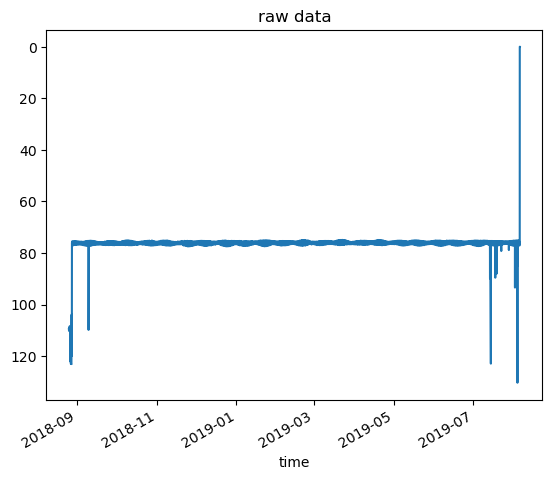

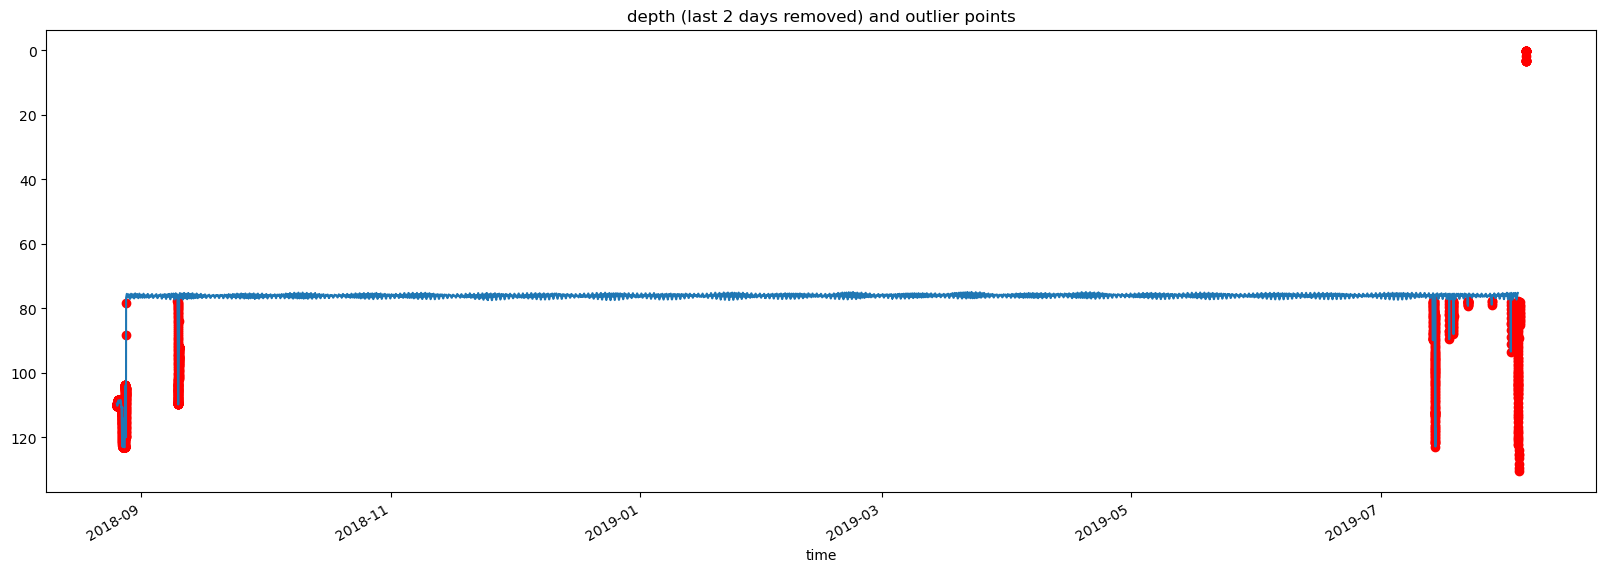

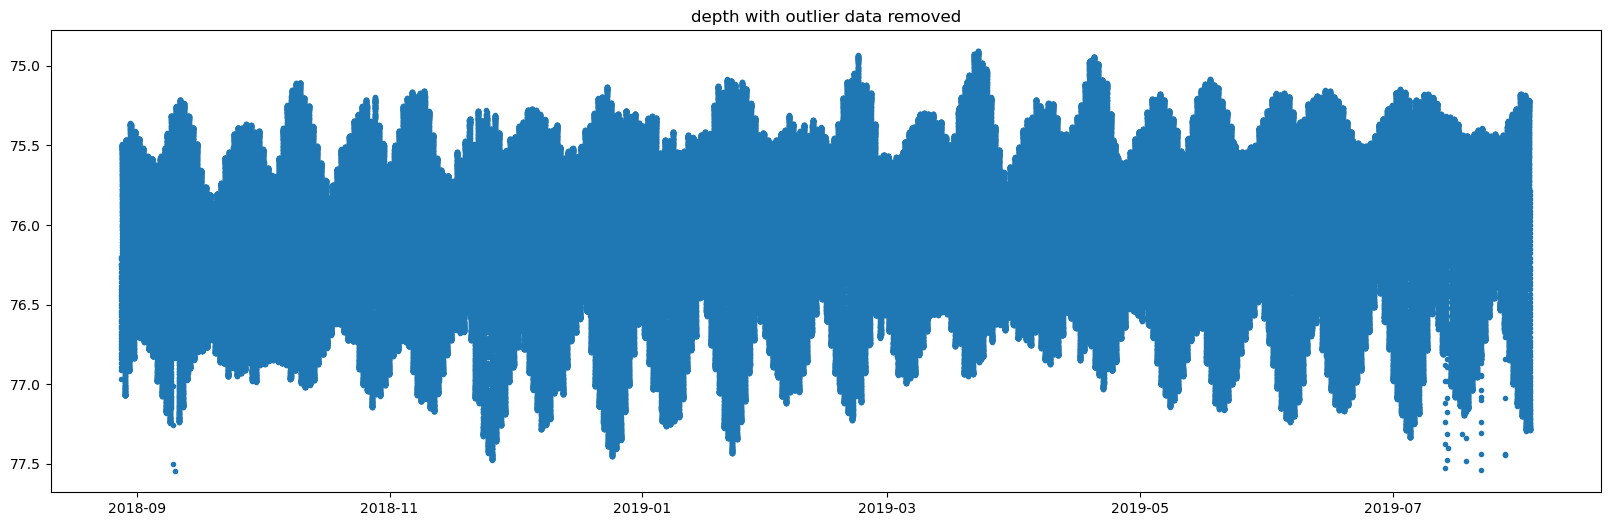

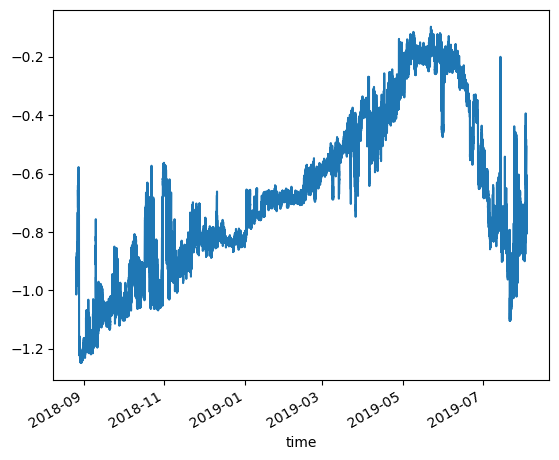

<xarray.Dataset>
Dimensions:                (time: 165351)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-26T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.7 2.714 2.715 ... 0.000137 0.000137
    density                (time) float64 1.027e+03 1.027e+03 ... 999.9 999.9
    depth                  (time) float64 109.5 109.5 109.5 ... 0.047 0.046
    potential_temperature  (time) float64 -0.9294 -0.9272 -0.9269 ... 6.898 6.94
    pressure               (time) float64 110.7 110.7 110.7 ... 0.047 0.047
    salinity               (time) float64 33.24 33.43 33.43 ... 0.0036 0.0036
    temperature            (time) float64 -0.9266 -0.9243 -0.924 ... 6.898 6.94
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069e5d6-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

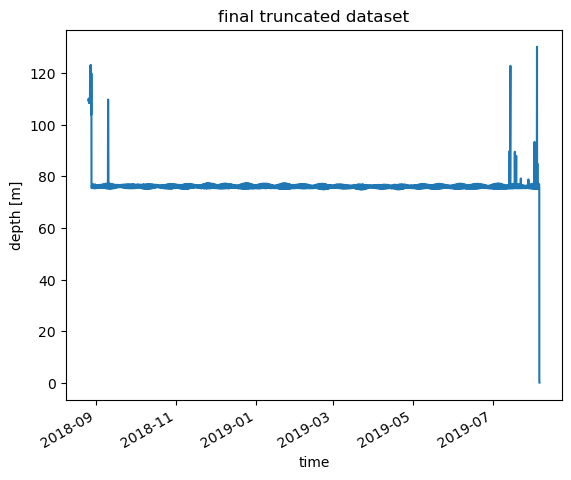

OMG_Narwhals_Mooring_CTD_L2_2019080503716789.nc
number data lines 165386
number header lines 312 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716789'>
2018-08-26T00:00:01
before
[238.000012 238.002095 238.004178 238.006262 238.008345]

after
[numpy.datetime64('2018-08-26T00:00:01'),
 numpy.datetime64('2018-08-26T00:03:01'),
 numpy.datetime64('2018-08-26T00:06:01'),
 numpy.datetime64('2018-08-26T00:09:01'),
 numpy.datetime64('2018-08-26T00:12:01')]
recording start time:  2018-08-26T00:00:01
recording end time:  2019-08-05T13:15:01


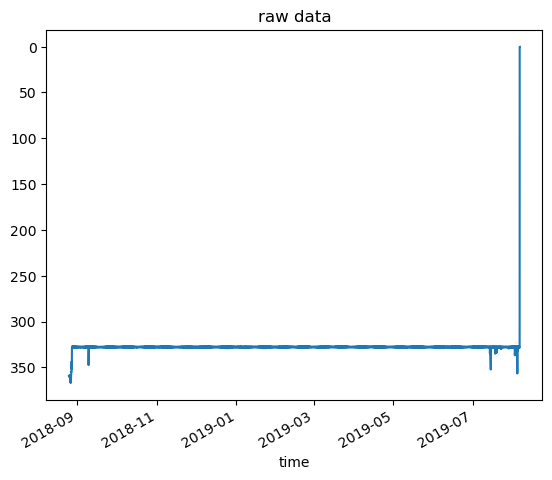

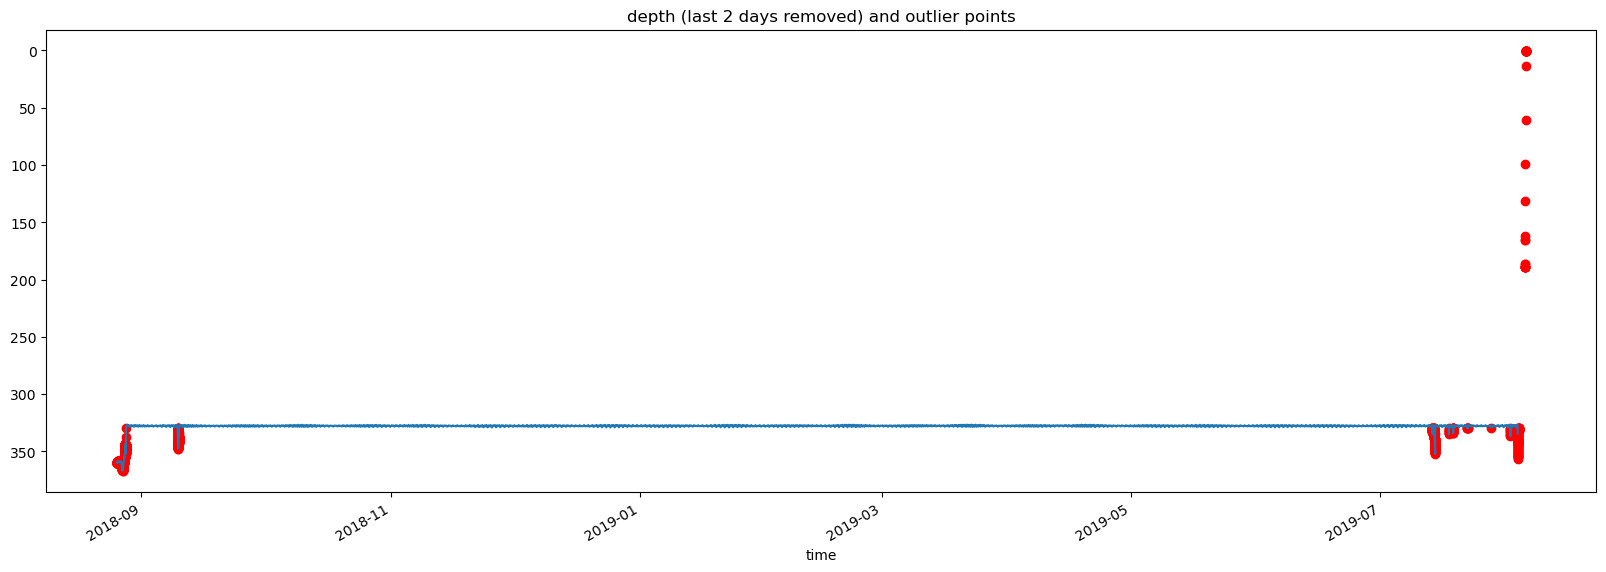

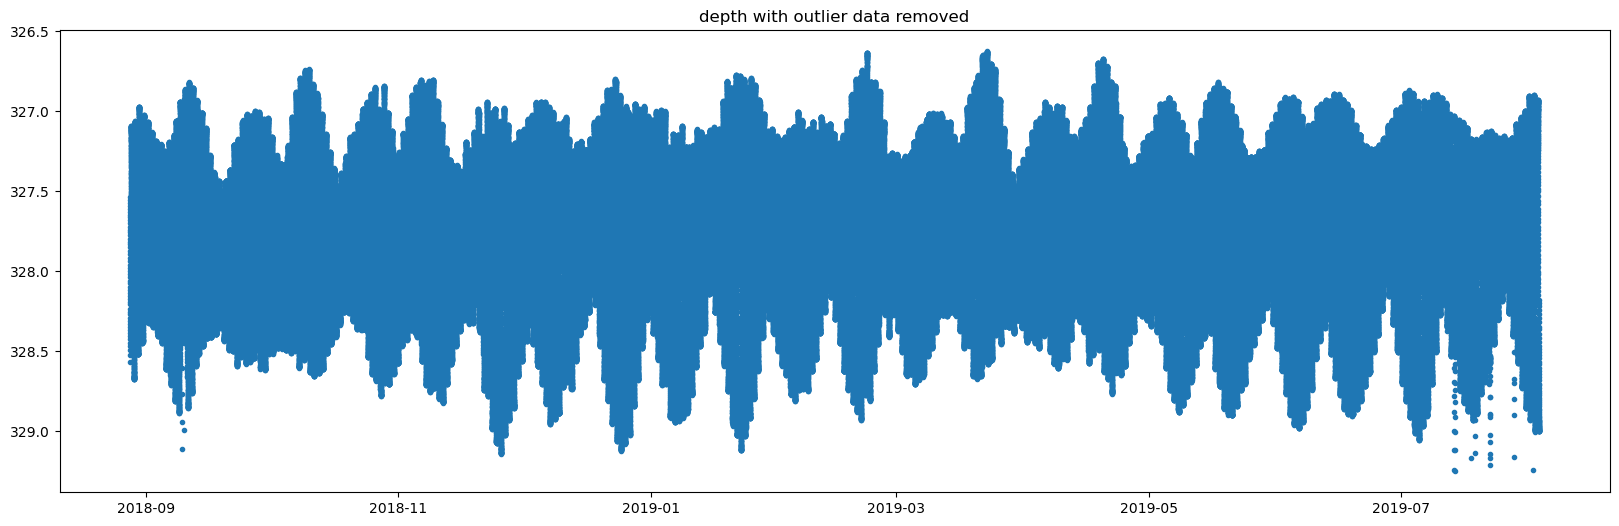

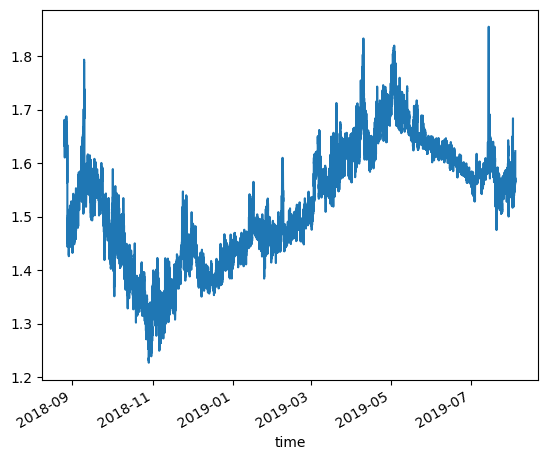

<xarray.Dataset>
Dimensions:                (time: 165386)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-26T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.991 3.005 ... 0.000193 0.000193
    density                (time) float64 1.029e+03 1.029e+03 ... 999.8 999.8
    depth                  (time) float64 359.5 359.5 359.5 ... 0.085 0.084
    potential_temperature  (time) float64 1.679 1.675 1.675 ... 8.65 8.738 8.857
    pressure               (time) float64 363.6 363.6 363.6 ... 0.086 0.085
    salinity               (time) float64 34.03 34.21 34.22 ... 0.0049 0.005
    temperature            (time) float64 1.698 1.694 1.693 ... 8.65 8.738 8.857
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069ee6e-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

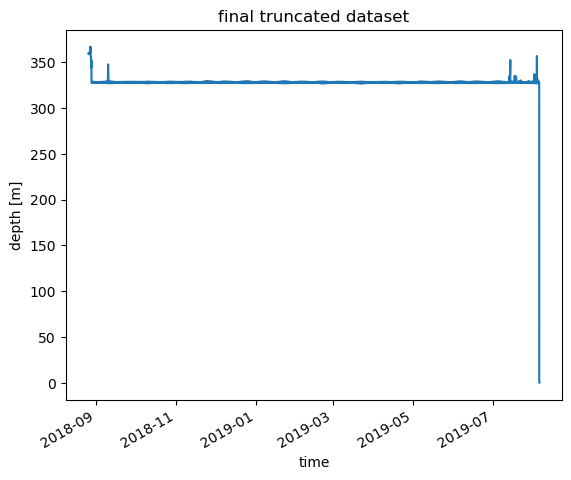

OMG_Narwhals_Mooring_CTD_L2_2019080303716790.nc
number data lines 165522
number header lines 307 

* <HardwareData DeviceType='SBE37SM-RS232' SerialNumber='03716790'>
2018-08-24T00:00:01
before
[236.000012 236.002095 236.004178 236.006262 236.008345]

after
[numpy.datetime64('2018-08-24T00:00:01'),
 numpy.datetime64('2018-08-24T00:03:01'),
 numpy.datetime64('2018-08-24T00:06:01'),
 numpy.datetime64('2018-08-24T00:09:01'),
 numpy.datetime64('2018-08-24T00:12:01')]
recording start time:  2018-08-24T00:00:01
recording end time:  2019-08-03T20:03:01


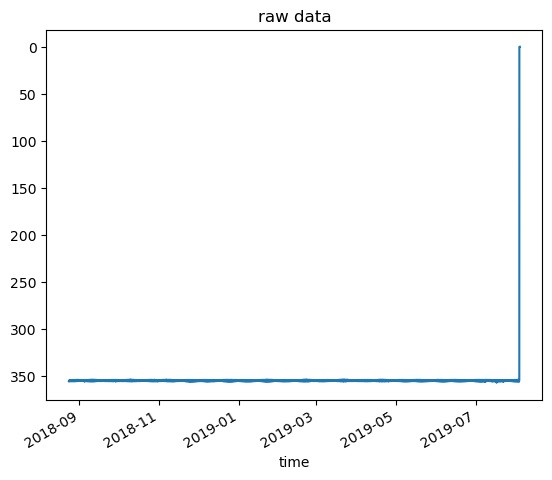

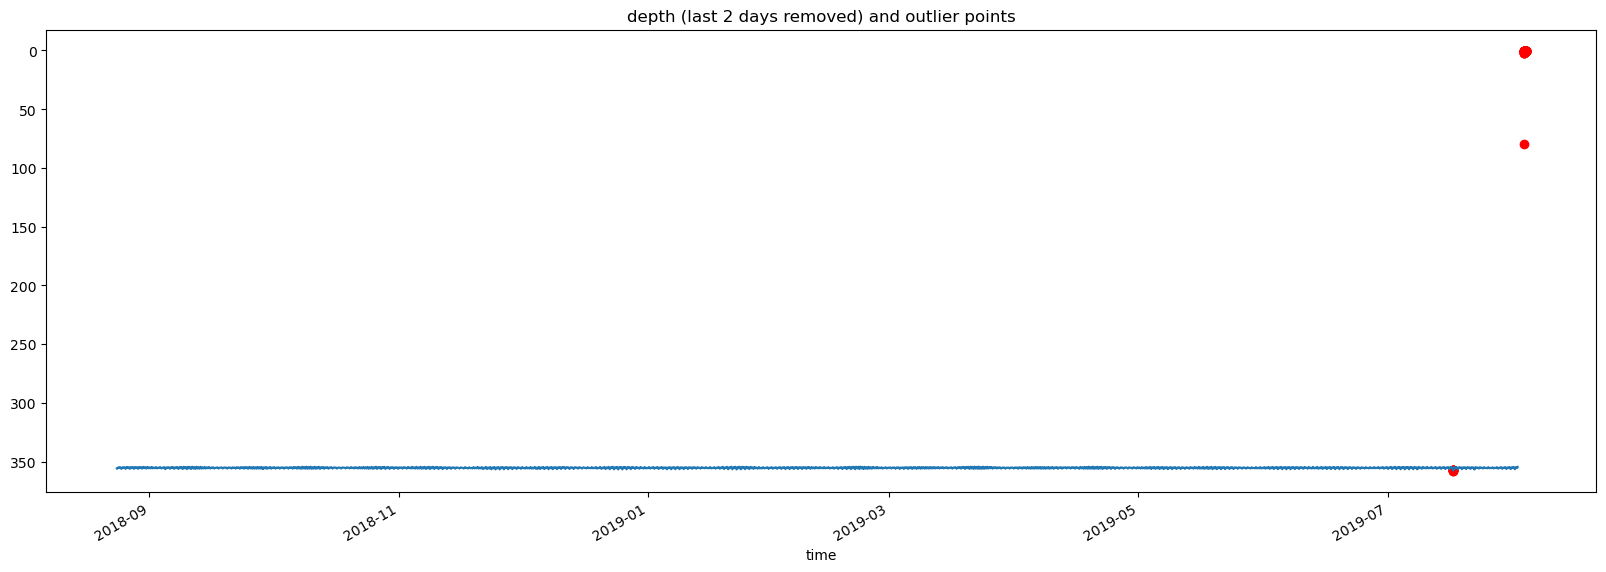

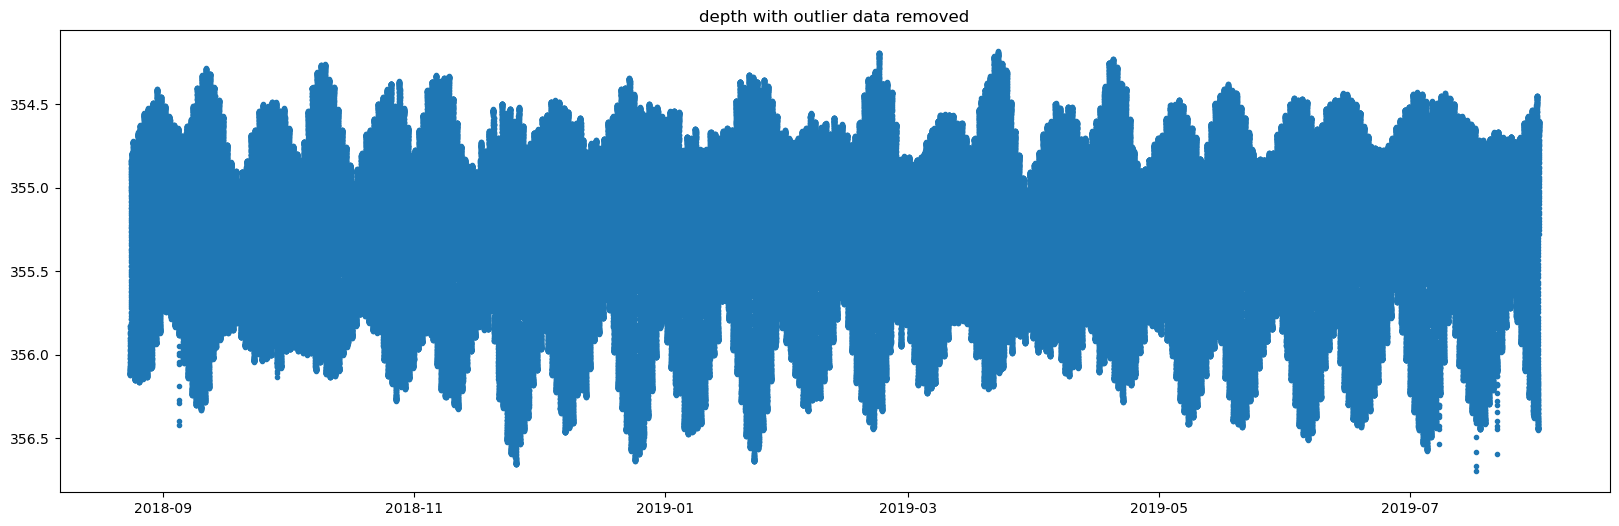

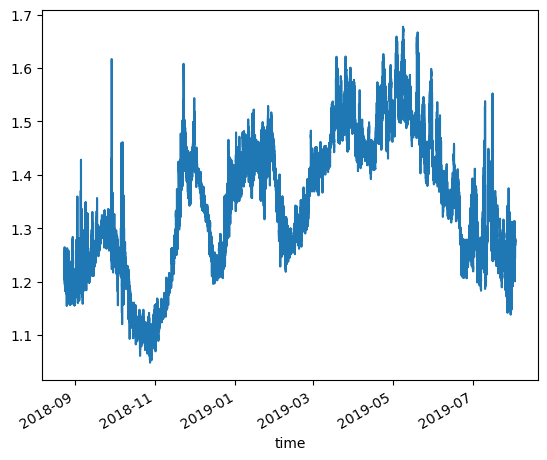

<xarray.Dataset>
Dimensions:                (time: 165522)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-24T00:00:01 ... 2019...
Data variables:
    conductivity           (time) float64 2.955 2.963 ... 0.000322 0.000325
    density                (time) float64 1.029e+03 1.029e+03 ... 999.4 999.4
    depth                  (time) float64 355.8 355.8 355.8 ... 0.042 0.044
    potential_temperature  (time) float64 1.224 1.23 1.23 ... 13.03 13.05 13.06
    pressure               (time) float64 359.9 359.9 359.9 ... 0.043 0.044
    salinity               (time) float64 34.06 34.17 34.18 ... 0.0076 0.0076
    temperature            (time) float64 1.241 1.247 1.248 ... 13.05 13.06
    flag                   (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    flag_depth             (time) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 2 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Salinity, Water Depth, Water Temper...
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L2
    uuid:                   9069f224-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

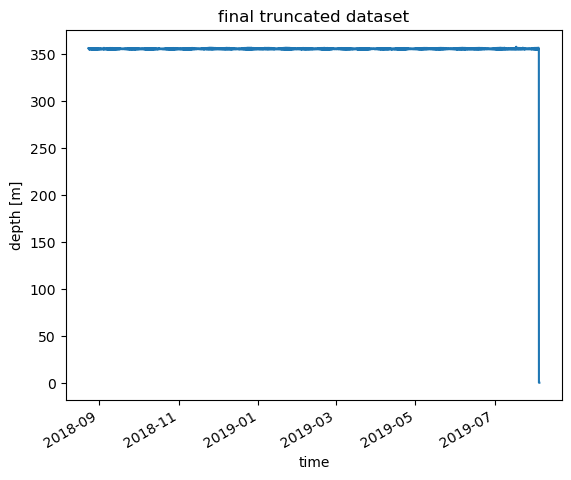

In [37]:
## create a loop that uses the above functions for all mooring data files
## loop through cnvfiles object

for filename in cnvfiles:
    # extract metadata
    data = metadata.loc[metadata['filename'] == filename] # select row for cnv file 'filename'
    glacier_front = data.glacier_front.values[0]
    lat = data.lat.values[0]
    lon = data.lon.values[0]
    bottom_depth = data.bottom_depth.values[0]
    
    ## =================== COMMENT OUT LINE FOR DESIRED FILE PATH - 2019 OR 2020 =================== ##
    # file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2019/SBE37/" + filename)
    file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L0/2020/SBE37/" + filename)
    
    uuid = data.uuid_L2.values[0]
    depth_target = data.depth_target.values[0]
    depth_actual = data.depth_actual.values[0]
    
    ## =================== COMMENT OUT LINE FOR DESIRED YEAR - 2019 OR 2020 =================== ##
    # netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_201908' + filename[31:33] + filename[14:22] + '.nc' # for 2019 data
    netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_20200805' + filename[14:22] + '.nc' # for 2020 data
    print(netcdf_filename)
    
    ## extract data, create dataset, and add metadata
    data_lines, device_type, serial_number, start_time_dt64, start_date, sample_interval_plain, sample_interval_td64, var_names = omg37_funs.open_omg_file(file)
    mooring_ds = omg37_funs.create_Dataset(glacier_front, data_lines, start_time_dt64, sample_interval_td64)
    mooring_ds = omg37_funs.add_metadata(mooring_ds, uuid, lat, lon, start_date, glacier_front, bottom_depth, netcdf_filename, serial_number, device_type, depth_target, depth_actual, sample_interval_plain)
    
    ## Create NetCDF variable encoding (required to save the time values properly)
    new_encoding = omg37_funs.create_encoding(mooring_ds)
    
    ## Save xarray DataSet object as netcdf
    num_times = len(mooring_ds.time)

    ## =================== COMMENT OUT LINE FOR DESIRED YEAR - 2019 OR 2020 =================== ##
    # 2019
    # if glacier_front=='Sverdrup glacier':
    #     mooring_ds_truncated = mooring_ds.sel(time=slice("2018-08-24","2019-08-03")) 
    # elif glacier_front=='Kong Oscar glacier':
    #     mooring_ds_truncated = mooring_ds.sel(time=slice("2018-08-25","2019-08-04"))
    # else: mooring_ds_truncated = mooring_ds.sel(time=slice("2018-08-26","2019-08-05"))
    # # final sanity check plot
    # mooring_ds_truncated.depth.sel(time=slice("2018-08-23","2019-08-05")).plot()
    
    # 2020
    if glacier_front=='Kong Oscar glacier':
        mooring_ds_truncated = mooring_ds.sel(time=slice("2019-08-04T14","2020-08-10T09")) 
    else: mooring_ds_truncated = mooring_ds.sel(time=slice("2019-08-05T20","2020-08-10T09"))
    # final sanity check plot
    mooring_ds_truncated.depth.sel(time=slice("2019-08-04","2020-08-10")).plot()
    
    plt.title("final truncated dataset (with flagged data)")
    plt.show()
    
    netcdf_filename = Path(netcdf_filename)
    mooring_ds_truncated.to_netcdf(output_dir / netcdf_filename,encoding=new_encoding)
    mooring_ds_truncated.close()

## Check the file

In [9]:
output_dir = Path('/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019/')

In [10]:
netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc'

In [24]:
netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716789.nc'

In [25]:
tmp = xr.open_dataset(output_dir / netcdf_filename)
tmp.close()

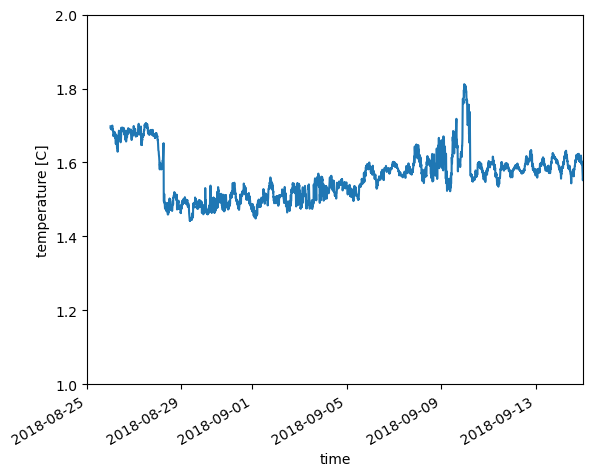

In [36]:
tmp.temperature.plot()
# plt.ylim(-2,0)
plt.ylim(1,2)
plt.xlim(np.datetime64('2018-08-25'), np.datetime64('2018-09-15'));

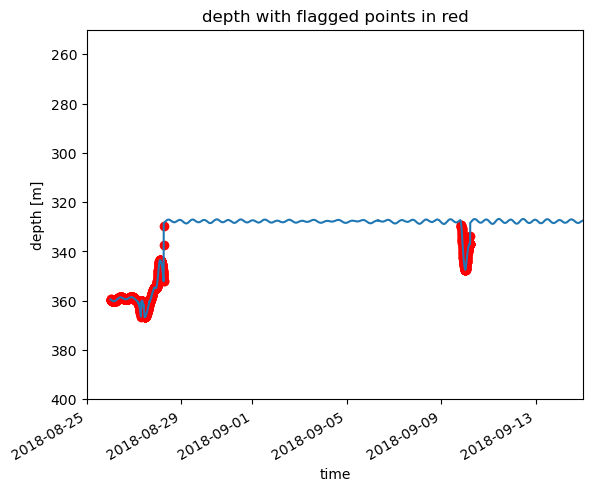

In [31]:
flag_depth = tmp['flag_depth']
tmp.depth[:-480].plot()
plt.scatter(tmp.time[np.where(flag_depth == 1)], tmp.depth[np.where(flag_depth == 1)], color='r')
plt.gca().invert_yaxis()
plt.xlim(np.datetime64('2018-08-25'), np.datetime64('2018-09-15'))
plt.ylim(400,250)
plt.title('depth with flagged points in red')
plt.show()

In [ ]:
tmp

In [ ]:
tmp.time[0:5]

***
# Create L1 netCDF from L2 netCDF

## Define output directory for L1 files

In [49]:
## =================== COMMENT OUT LINE FOR DESIRED FILE PATH - 2019 OR 2020 =================== ##
## 2019
# output_dir = Path('/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/2019/SBE37/')
## 2020
output_dir = Path('/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/2020/SBE37/')

## Get names of all netCDF files from L2 data directory

In [50]:
## get all filenames and metadata

## =================== COMMENT OUT LINE FOR DESIRED FILE PATH - 2019 OR 2020 =================== ##
## 2019
# os.chdir("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019")
##2020
os.chdir("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020")

nc_files = []
for file in glob.glob("*.nc"):
    nc_files.append(file)
print(nc_files)

['OMG_Narwhals_Mooring_CTD_L2_2020080603716526.nc', 'OMG_Narwhals_Mooring_CTD_L2_2020080603716754.nc', 'OMG_Narwhals_Mooring_CTD_L2_2020080603716787.nc', 'OMG_Narwhals_Mooring_CTD_L2_2020080603716790.nc']


## loop through all L2 datasets and modify to make L1

OMG_Narwhals_Mooring_CTD_L1_2020080603716526.nc


<xarray.Dataset>
Dimensions:       (time: 177880)
Coordinates:
  * time          (time) datetime64[ns] 2019-08-05T20:00:01 ... 2020-08-10T09...
Data variables:
    conductivity  (time) float64 ...
    depth         (time) float64 ...
    pressure      (time) float64 ...
    temperature   (time) float64 ...
    flag          (time) float64 ...
    flag_depth    (time) float64 ...
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 1 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Water Depth, Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L1
    uuid:                   37f98ca6-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

OMG_Narwhals_Mooring_CTD_L1_2020080603716754.nc


<xarray.Dataset>
Dimensions:       (time: 177880)
Coordinates:
  * time          (time) datetime64[ns] 2019-08-05T20:00:01 ... 2020-08-10T09...
Data variables:
    conductivity  (time) float64 ...
    depth         (time) float64 ...
    pressure      (time) float64 ...
    temperature   (time) float64 ...
    flag          (time) float64 ...
    flag_depth    (time) float64 ...
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 1 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Water Depth, Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L1
    uuid:                   37f98b8e-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

OMG_Narwhals_Mooring_CTD_L1_2020080603716787.nc


<xarray.Dataset>
Dimensions:       (time: 178480)
Coordinates:
  * time          (time) datetime64[ns] 2019-08-04T14:00:01 ... 2020-08-10T09...
Data variables:
    conductivity  (time) float64 ...
    depth         (time) float64 ...
    pressure      (time) float64 ...
    temperature   (time) float64 ...
    flag          (time) float64 ...
    flag_depth    (time) float64 ...
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 1 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Water Depth, Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L1
    uuid:                   37f9886e-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

OMG_Narwhals_Mooring_CTD_L1_2020080603716790.nc


<xarray.Dataset>
Dimensions:       (time: 178480)
Coordinates:
  * time          (time) datetime64[ns] 2019-08-04T14:00:01 ... 2020-08-10T09...
Data variables:
    conductivity  (time) float64 ...
    depth         (time) float64 ...
    pressure      (time) float64 ...
    temperature   (time) float64 ...
    flag          (time) float64 ...
    flag_depth    (time) float64 ...
Attributes: (12/41)
    title:                  OMG Narwhals mooring CTD Level 1 Data
    summary:                This dataset contains conductivity, temperature, ...
    keywords:               Conductivity, Water Depth, Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_CTD_L1
    uuid:                   37f98a3a-726d-11ec-90d6-0242ac120003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

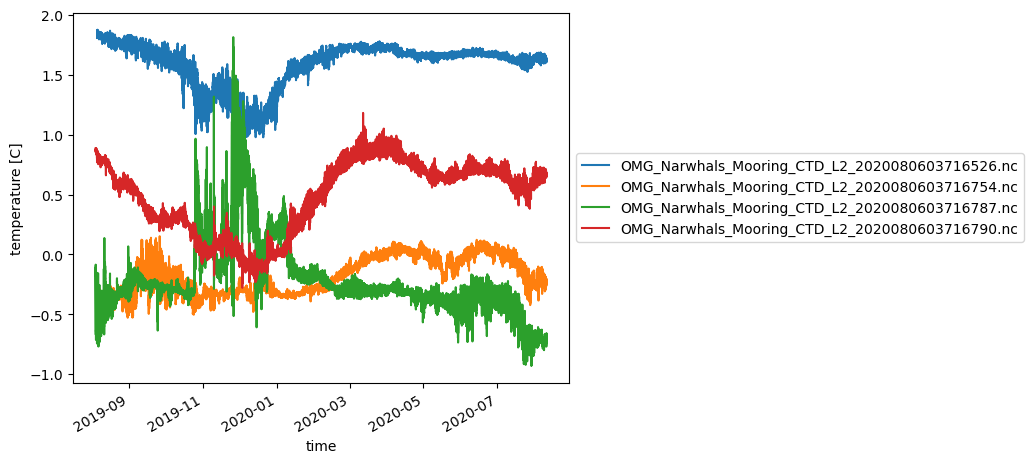

In [51]:
## loop to run through L2 files and modify to make L1
for filename in nc_files:

    data = metadata.loc[metadata['filename_L2'] == filename] # select row for cnv file 'filename'
    
    ## =================== COMMENT OUT LINE FOR DESIRED FILE PATH - 2019 OR 2020 =================== ##
    # file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019/" + filename) # 2019 data
    file = Path("/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020/" + filename) # 2020 data
    uuid = data.uuid_L1.values[0]
    netcdf_filename = 'OMG_Narwhals_Mooring_CTD_L1' + filename[27:]
    print(netcdf_filename)
    
    # read in L2 netCDF file
    sbe37data = xr.open_dataset(file)
    sbe37data.close()
    # remove derived variables: salinity, density, and potential temperature
    sbe37data_L1 = sbe37data.drop(labels = ['salinity', 'density', 'potential_temperature'])
    sbe37data_L1
    
    ## change global attributes for L1 dataset
    sbe37data_L1.attrs['title'] = 'OMG Narwhals mooring CTD Level 1 Data'
    sbe37data_L1.attrs['summary'] = 'This dataset contains conductivity, temperature, pressure, and depth measurements from a CTD instrument that was attached to an ocean mooring. This dataset was collected by the Oceans Melting Greenland (OMG) Narwhals program that will provide subannual hydrographic variability measurements in three northwest Greenland fjords. Between July 2018 to July 2020, three bottom-mounted moorings with a suite of instrumentation were deployed year-round in three glacial fjord sites in Melville Bay, West Greenland: Sverdrup Glacier, Kong Oscar Glacier, and Fisher Islands/Rink Glacier. Examination of water properties at these sites will demonstrate the presence and potential seasonality of warm, salty Atlantic Water intrusion into these marine-terminating glaciers. Additonally, during summer cruises where moorings were deployed and/or recovered, a CTD was lowered into the water to obtain full water column profiles at various locations near the glacier fronts and offshore.'
    sbe37data_L1.attrs['keywords'] = 'Conductivity, Water Depth, Water Temperature'
    sbe37data_L1.attrs['id'] = 'OMG_Narwhals_Mooring_CTD_L1'
    sbe37data_L1.attrs['uuid'] = uuid
    sbe37data_L1.attrs['filename'] = netcdf_filename
    sbe37data_L1.attrs['processing_level'] = 'L1'
    
    ## sanity plot
    sbe37data_L1.temperature.plot(label = filename)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    with xr.set_options(display_style="html"):
        display(sbe37data_L1)
        
    ## save xarray dataset object as netcdf
    netcdf_filename = Path(netcdf_filename)
    sbe37data_L1.to_netcdf(output_dir / netcdf_filename)
    sbe37data_L1.close()

## Check the file

In [ ]:
tmp = xr.open_dataset(output_dir / netcdf_filename)
tmp.close()
tmp